In [7]:
import pandas as pd
import numpy as np

### Functions

In [32]:
##-----Part 1

#create weights for inplace, and elsewhere values

def letter_summer(word):
    w_iter = 0
    value_place = 0
    value_else = 0
    for letter in word:
        value_place +=  [(x_df['placement'] == w_iter+1) & (x_df['character'] == letter.upper())]['count'].item()
        value_else += x_df[(x_df['placement'] != w_iter+1) & (x_df['character'] == letter.upper())]['count'].sum()
        w_iter += 1
    return value_place,value_else


##-----Part 2

#find letters in and not in words
def is_letter_in_word(target_word, guess):
    x = []
    y = []
    for i in list(guess):
        if i in list(target_word):
            x.append(i)
        else:
            y.append(i)
    return x,y

#create a script that takes all possible solutions and collapses to the highest rated one till it reaches the right word. 
def wfc_solve(target_word,list, method='total_value'):
    #method can be value_else, value_place, total_value
    
    list_of_columns = ['first_letter','second_letter','third_letter','fourth_letter','fifth_letter']
    
    guess_list = []
    wfc_list = list.copy()
    guess_count = 0
    guess = wfc_list.query('unique_chars==5').sort_values(by = method,ascending = False).head(1)['word'].item() #start with a word with max different characters
    
    while (guess_count < 100): #hard code a limit of 100 guesses
        #define a new guess
        
       
        #see if letters in target:
        if guess != target_word:
            in_word,not_in_word = is_letter_in_word(target_word,guess)
            for i in not_in_word:
                wfc_list = wfc_list[wfc_list['first_letter'] != i]
                wfc_list = wfc_list[wfc_list['second_letter'] != i]
                wfc_list = wfc_list[wfc_list['third_letter'] != i]
                wfc_list = wfc_list[wfc_list['fourth_letter'] != i]
                wfc_list = wfc_list[wfc_list['fifth_letter'] != i]
        
        
        
        #clamp letters that are in the right place
        
            for j in in_word:
                index = 0
                for k in target_word:
                    if j == k:
                        wfc_list = wfc_list[wfc_list[list_of_columns[index]] == j]
                    index += 1
         
        guess_count += 1    
        
        guess_list.append(guess)
        
        if guess == target_word:
            break
        else:
            wfc_list = wfc_list[wfc_list['word'] != guess]
        guess = wfc_list.sort_values(by = method,ascending = False).head(1)['word'].item()    
            
    return guess_list

<>:10: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:10: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
C:\Users\samml\AppData\Local\Temp\ipykernel_15204\4023860250.py:10: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  value_place +=  [(x_df['placement'] == w_iter+1) & (x_df['character'] == letter.upper())]['count'].item()


### Part 0: Initialize the word list 
This is what we will be building off of. This can differ than the words that Wordle uses, and there were repositories that were scapred from wordle for all possible words, but this mimics what it would be like to do this without a backdoor in to the answers, and since the problem space of 5 letter words shouldn't really be expanding that much. 

In [8]:
#words taken from https://eslforums.com/5-letter-words/

with open('files/wordle_list.txt') as f:
    lines = f.readlines()

words5 = [s.strip() for s in lines]


In [9]:

#create a dataframe of letter, placement in a 5 letter word, and occurances



first = [s[0].upper() for s in words5 if len(s)>0]
second = [s[1].upper() for s in words5 if len(s)>0]
third = [s[2].upper() for s in words5 if len(s)>0]
fourth = [s[3].upper() for s in words5 if len(s)>0]
fifth = [s[4].upper() for s in words5 if len(s)>0]

x = {"placement":[],"character":[],"count":[]}
q = 1
for j in [first, second, third, fourth, fifth]:
    for i in range(ord("A"),ord("Z")+1):
        x["placement"].append(q)
        x["character"].append(chr(i))
        x["count"].append(j.count(chr(i)))
    q += 1

x_df = pd.DataFrame(x)



### Part 1: Initialize the file of word weights
For each word that is in the file, we then build out 3 values:
* value_place: sum of counts of letters that occur in other words (ex. for position 3 or word glAre: yards, stAir.)
* value_else: sum of counts of letters else where in the words (ex. for position 3 of word glAre: yArds, stAir. )
* total_value: sum of both value_place and value_else
* norm_total: normalization of value_else and value_place within their own values so one doesn't out-rank the other.

Once done, save it to a CSV file as this take about a minute to create and shouldn't change run to run.

In [18]:

word_list = pd.DataFrame()

for z in words5:

    value_place, value_else = letter_summer(z)
    total_value = value_else + value_place
    leaf = pd.DataFrame({"word":z,"value_place":value_place,"value_else":value_else,"total_value":total_value},index = [0])
    word_list = pd.concat([word_list,leaf])
    
word_list = word_list[word_list['word'] != ""]
word_list['unique_chars'] = word_list['word'].apply(lambda x: len(set(x)))

word_list['norm_place'] = (word_list['value_place']-min(word_list['value_place']))/(max(word_list['value_place'])-min(word_list['value_place']))
word_list['norm_else'] = (word_list['value_else']-min(word_list['value_else']))/(max(word_list['value_else'])-min(word_list['value_else']))
word_list['norm_total'] = word_list['norm_else'] + word_list['norm_place']


word_list['first_letter'] = word_list['word'].apply(lambda x: x[0])
word_list['second_letter'] = word_list['word'].apply(lambda x: x[1])
word_list['third_letter'] = word_list['word'].apply(lambda x: x[2])
word_list['fourth_letter'] = word_list['word'].apply(lambda x: x[3])
word_list['fifth_letter'] = word_list['word'].apply(lambda x: x[4])

word_list.to_csv('files/word_list.csv')

In [19]:
word_list.head()

,word,value_place,value_else,total_value,unique_chars,norm_place,norm_else,norm_total,first_letter,second_letter,third_letter,fourth_letter,fifth_letter
0,cigar,4416,13163,17579,5,0.331479,0.405899,0.737378,c,i,g,a,r
0,rebut,3719,14534,18253,5,0.262222,0.461833,0.724055,r,e,b,u,t
0,sissy,5298,20530,25828,3,0.419118,0.706458,1.125576,s,i,s,s,y
0,humph,2975,7051,10026,4,0.188295,0.156542,0.344837,h,u,m,p,h
0,awake,4161,17025,21186,4,0.306141,0.563461,0.869602,a,w,a,k,e


### Part 2: WFC Guessing based on Values
There are 4 optimization values from before that we can optimize the algorith to

In [ ]:
#word_list = pd.read_csv('files/word_list.csv')

In [34]:
##value = np.random.choice(words5)
value = 'agile' #wordle 711

#different methods to maximize towards are input into the solver, this is what will sort the dataframe

print(f'Target word is {value}')
for i in ['total_value','norm_total','value_place','value_else']:
    guess_vec = wfc_solve(value,word_list,i)
    print(f'Method: {i} \n N Guesses: {len(guess_vec)} \n Guess_vector: {guess_vec}')


Target word is agile
Method: total_value 
 N Guesses: 6 
 Guess_vector: ['arose', 'allee', 'anele', 'abele', 'avale', 'agile']
Method: norm_total 
 N Guesses: 4 
 Guess_vector: ['tares', 'ainee', 'alike', 'agile']
Method: value_place 
 N Guesses: 4 
 Guess_vector: ['cares', 'ainee', 'alike', 'agile']
Method: value_else 
 N Guesses: 6 
 Guess_vector: ['arose', 'anele', 'abele', 'avale', 'addle', 'agile']


In [49]:
#metrics of some of the better words to start with

word_list[word_list['word'].isin(['tares','stear','cores','arose'])]

,word,value_place,value_else,total_value,unique_chars,norm_place,norm_else,norm_total,first_letter,second_letter,third_letter,fourth_letter,fifth_letter
0,arose,4708,23205,27913,5,0.360493,0.815593,1.176086,a,r,o,s,e
0,cores,10501,13450,23951,5,0.936109,0.417608,1.353717,c,o,r,e,s
0,stear,4433,22337,26770,5,0.333168,0.780180,1.113348,s,t,e,a,r
0,tares,10561,16209,26770,5,0.942071,0.530170,1.472241,t,a,r,e,s


In [51]:
#metrics of words that include the same letters

word_list[word_list['word'].isin(['tares','stear','tears','rates','aster','resat','taser'])]

,word,value_place,value_else,total_value,unique_chars,norm_place,norm_else,norm_total,first_letter,second_letter,third_letter,fourth_letter,fifth_letter
0,aster,4446,22324,26770,5,0.334459,0.779650,1.114109,a,s,t,e,r
0,rates,9792,16978,26770,5,0.865660,0.561544,1.427204,r,a,t,e,s
0,resat,4590,22180,26770,5,0.348768,0.773775,1.122543,r,e,s,a,t
0,stear,4433,22337,26770,5,0.333168,0.780180,1.113348,s,t,e,a,r
0,tares,10561,16209,26770,5,0.942071,0.530170,1.472241,t,a,r,e,s
0,taser,6611,20159,26770,5,0.549583,0.691322,1.240905,t,a,s,e,r
0,tears,8356,18414,26770,5,0.722973,0.620130,1.343103,t,e,a,r,s


### Part 3: Visualizing the differences in guess types

In [37]:
guess_list = pd.DataFrame()

#choose 1000 random words to check how long it will take to guess then in each different method.

for i in range(1000):
    value = np.random.choice(words5)
    guess_list = pd.concat([guess_list,pd.DataFrame({"word":value,
                                    "total_value":len(wfc_solve(value,word_list)),
                                    "norm_total":len(wfc_solve(value,word_list,'norm_total')),
                                    "value_place":len(wfc_solve(value,word_list,'value_place')),
                                    "value_else":len(wfc_solve(value,word_list,'value_else'))
                                   },index=[0])])
guess_list.head(10)

,word,total_value,norm_total,value_place,value_else
0,lesbo,4,3,3,3
0,grace,6,5,4,6
0,undug,3,4,4,3
0,vomit,4,4,4,5
0,lepra,3,3,4,3
0,berms,12,9,6,13
0,talus,9,5,7,7
0,dicty,5,6,3,5
0,flors,7,8,8,6
0,silky,5,6,6,5


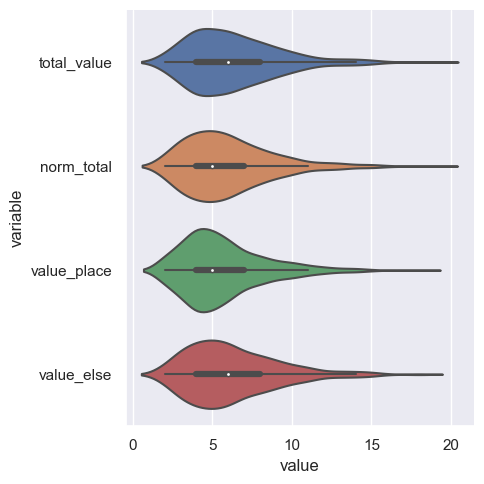

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns

guess_list_MELT = pd.melt(guess_list,id_vars = 'word')

sns.catplot(
    data=guess_list_MELT, x="value", y="variable", kind="violin",
)

Value place looks to be the best performing of the different "methods" that we are using. Below is the top words that are based on the `value_place` metric

In [52]:
word_list.query('unique_chars==5').sort_values(by = 'value_place',ascending = False).head(10)

,word,value_place,value_else,total_value,unique_chars,norm_place,norm_else,norm_total,first_letter,second_letter,third_letter,fourth_letter,fifth_letter
0,cares,10668,14835,25503,5,0.952703,0.474114,1.426816,c,a,r,e,s
0,bares,10655,14447,25102,5,0.951411,0.458284,1.409695,b,a,r,e,s
0,pares,10605,14889,25494,5,0.946443,0.476317,1.422760,p,a,r,e,s
0,tares,10561,16209,26770,5,0.942071,0.530170,1.472241,t,a,r,e,s
0,cores,10501,13450,23951,5,0.936109,0.417608,1.353717,c,o,r,e,s
0,bores,10488,13062,23550,5,0.934817,0.401779,1.336596,b,o,r,e,s
0,mares,10439,15012,25451,5,0.929948,0.481335,1.411283,m,a,r,e,s
0,pores,10438,13504,23942,5,0.929849,0.419812,1.349660,p,o,r,e,s
0,canes,10434,13863,24297,5,0.929452,0.434458,1.363910,c,a,n,e,s
0,dares,10431,15497,25928,5,0.929153,0.501122,1.430275,d,a,r,e,s
